In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.   Sampling

In [ ]:
#Assignment 1-Sampling
#call function sampling with N as number of days and get the fraction of days picked for each activity
import random
def sampling(N):
  movie_count=0
  inf_count=0
  play_count=0
  study_count=0
  for i in range (N):
    x=random.uniform(0, 1)
    if 0<=x<=0.2:
      movie_count+=1
    elif 0.2<x<=0.6:
      inf_count+=1
    elif 0.6<x<=0.7:
      play_count+=1
    elif 0.7<x<=1:
      study_count+=1
  print(f'Movies: {movie_count/N}\n INF8245E:{inf_count/N}\n Playing:{play_count/N}\n Studying:{study_count/N}')
sampling(1000)

Movies: 0.2
 INF8245E:0.395
 Playing:0.1
 Studying:0.305


#2.   Model Selection

In [242]:
def rmse(prediction, target): #function to calculate Root Mean-Square Error 
    return math.sqrt(((prediction - target) ** 2).mean())


In [243]:
import pandas as pd
train_df=pd.read_csv('/content/drive/MyDrive/Automn 2021/Machin Learning/Assigignment1/hwk1_datasets (1)/Datasets/Dataset_1_train.csv', header=None)
valid_df=pd.read_csv('/content/drive/MyDrive/Automn 2021/Machin Learning/Assigignment1/hwk1_datasets (1)/Datasets/Dataset_1_valid.csv', header=None)
test_df=pd.read_csv('/content/drive/MyDrive/Automn 2021/Machin Learning/Assigignment1/hwk1_datasets (1)/Datasets/Dataset_1_test.csv', header=None)
train_df=train_df.sort_values(by=[0])
valid_df=valid_df.sort_values(by=[0])
test_df=test_df.sort_values(by=[0])


y_train=train_df[[1]]
x_train=train_df[[0]]
train_df=train_df.drop(columns=[1,2])
train_df.columns=[1]

y_valid=valid_df[[1]]
x_valid=valid_df[[0]]
valid_df=valid_df.drop(columns=[1,2])
valid_df.columns=[1]

y_test=test_df[[1]]
x_test=test_df[[0]]
test_df=test_df.drop(columns=[1,2])
test_df.columns=[1]



In [244]:
#create matrix with N+1 column from x vector, each column is x^(column number)
def create_matrix(vector,N):
  matrix=vector
  for i in range(N+1):
    matrix[i]=matrix[1]**i
  matrix = matrix.reindex(sorted(matrix.columns), axis=1)
  return matrix



In [245]:
train_matrix=create_matrix(train_df[[1]],20)
valid_matrix=create_matrix(valid_df[[1]],20)
test_matrix=create_matrix(test_df[[1]],20)


**2.1.a**

In [246]:
import numpy as np
def model_coef_no_regular(X_matrix, y_train):
  invXTX=np.linalg.pinv(np.dot(X_matrix.T, X_matrix))
  XTy=np.dot(X_matrix.T, y_train)
  return (np.dot(invXTX, XTy))

W=model_coef_no_regular(train_matrix, y_train)
predict_train=np.dot(train_matrix,W)
predict_valid=np.dot(valid_matrix,W)
print('RMSE for train: ',rmse(predict_train, y_train))
print('RMSE for validation: ',rmse(predict_valid, y_valid))



RMSE for train:  2.6744683252537538
RMSE for validation:  21.392754106535985


**2.1.b**

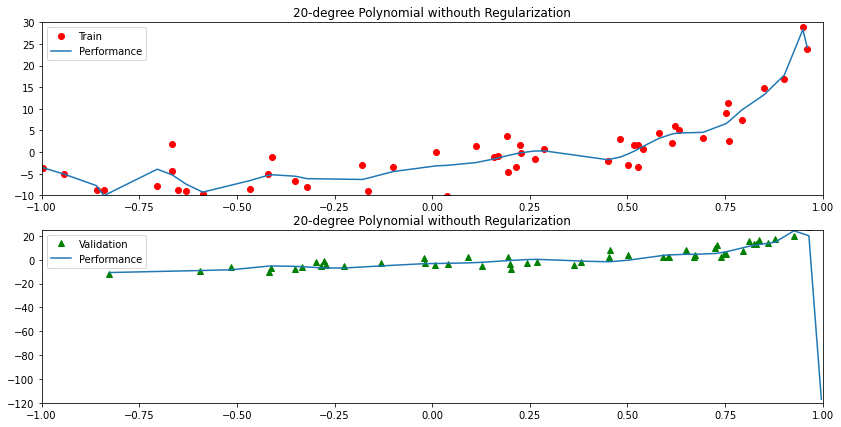

In [247]:

plt.subplot(2,1,1)
plt.plot(x_train, y_train, "ro")
plt.plot(x_train, predict_train)
plt.legend(['Train', 'Performance'])
plt.title('20-degree Polynomial withouth Regularization')
plt.axis([-1, 1, -10, 30])

plt.subplot(2,1,2)
plt.plot(x_valid, y_valid, "g^")
plt.plot(x_valid, predict_valid)

plt.title('20-degree Polynomial withouth Regularization')
plt.legend(['Validation', 'Performance'])
plt.rcParams["figure.figsize"] = (14,7)
plt.axis([-1, 1, -120, 25])
plt.show()

In [248]:
#2.1.c
rmse_train_list=[]
rmse_valid_list=[]
rmse_test_list=[]
for i in range(21):
  train_matrix=create_matrix(train_df[[1]],i)
  valid_matrix=create_matrix(valid_df[[1]],i)
  test_matrix=create_matrix(test_df[[1]],i)
  W=model_coef_no_regular(train_matrix, y_train)
  predict_train=np.dot(train_matrix,W)
  predict_valid=np.dot(valid_matrix,W)
  predict_test=np.dot(test_matrix,W)
  rmse_train=rmse(predict_train, y_train)
  rmse_valid=rmse(predict_valid, y_valid)
  rmse_test=rmse(predict_test, y_test)
  rmse_train_list.append(rmse_train)
  rmse_valid_list.append(rmse_valid)
  rmse_test_list.append(rmse_test)



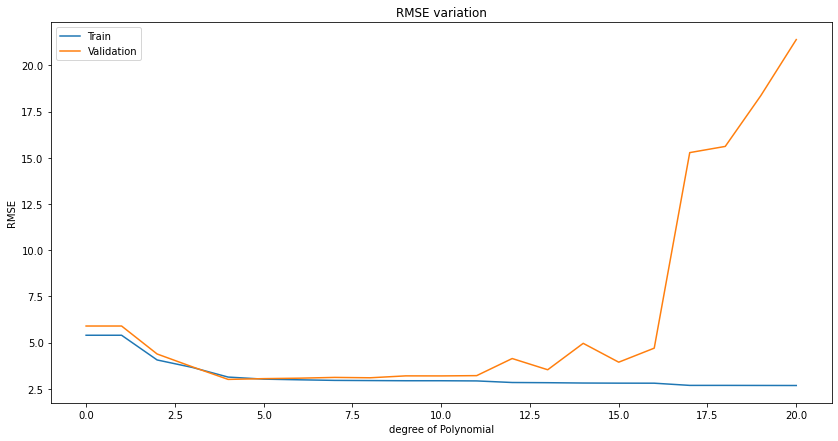

In [249]:
#2.1.c
degree = np.arange(0, 21, 1)
plt.plot(degree, rmse_train_list)
plt.plot(degree, rmse_valid_list)
# plt.plot(degree, rmse_test_list)
plt.xlabel('degree of Polynomial')
plt.ylabel('RMSE')
plt.legend(['Train', 'Validation', 'Test'])
plt.title('RMSE variation')
plt.show()

In [250]:
def model_coef_with_regular(X_matrix, y_train, lamda):
  d = np.eye(21)
  invXTXlamda=np.linalg.pinv(np.dot(X_matrix.T, X_matrix)+lamda*d)
  XTy=np.dot(X_matrix.T, y_train)
  return (np.dot(invXTXlamda, XTy))

# W=model_coef_no_regular(train_matrix, y_train)

In [282]:
lamda=np.arange(0, 1.01, 0.01)
rmse_train_list=[]
rmse_valid_list=[]
train_matrix=create_matrix(train_df[[1]],20)
valid_matrix=create_matrix(valid_df[[1]],20)
for l in lamda:
  W=model_coef_with_regular(train_matrix, y_train,l)
  predict_train=np.dot(train_matrix,W)
  predict_valid=np.dot(valid_matrix,W)
  rmse_train=rmse(predict_train, y_train)
  rmse_valid=rmse(predict_valid, y_valid)
  rmse_train_list.append(rmse_train)
  rmse_valid_list.append(rmse_valid)




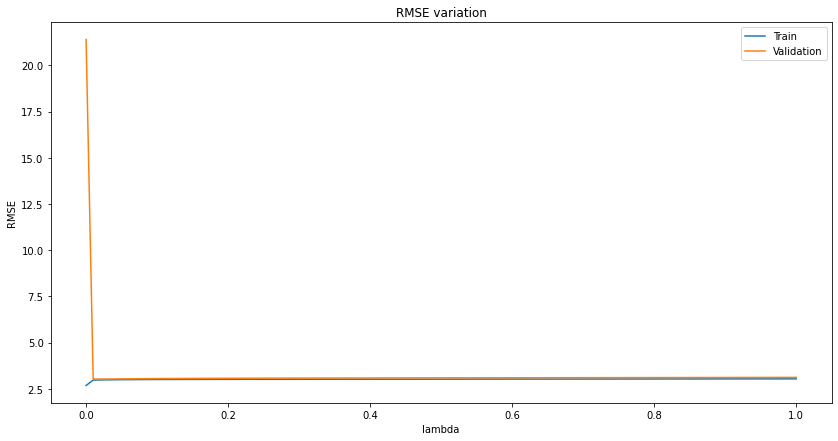

In [283]:
#2.2.a
plt.plot(lamda, rmse_train_list)
plt.plot(lamda, rmse_valid_list)
# plt.plot(lamda, rmse_test_list)
plt.xlabel('lambda') #lambda not degree
plt.ylabel('RMSE')
plt.legend(['Train', 'Validation', 'Test'])
plt.title('RMSE variation')
plt.show()

In [280]:
#2.2.b rmse of model on test set at lamda=0.02
min_index_lambda=rmse_valid_list.index(min(rmse_valid_list))
best_lambda=min_index_lambda*0.01
print(f'best lambda is {best_lambda}')

best lambda is 0.02


In [286]:
min(rmse_valid_list)

3.0224325939041976

In [281]:
x_train_complete=pd.concat([train_df[[1]], valid_df[[1]]])
y_train_complete=pd.concat([y_train, y_valid])
train_matrix_complete=create_matrix(x_train_complete,20)
test_matrix=create_matrix(test_df[[1]],20)
W=model_coef_with_regular(x_train_complete, y_train_complete,best_lambda)
predict_test=np.dot(test_matrix,W)
print(f' RMSE of test set is {rmse(predict_test, y_test)}')

 RMSE of test set is 11.9645022152515


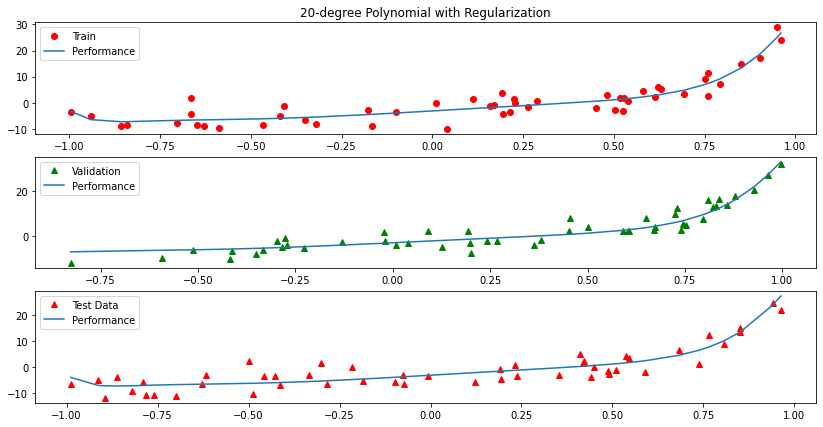

In [284]:
W1=model_coef_with_regular(train_matrix, y_train,0.02)
predict_train=np.dot(train_matrix,W1)
predict_valid=np.dot(valid_matrix,W1)
predict_test=np.dot(test_matrix,W1)

plt.subplot(3,1,1)
plt.plot(x_train, y_train, "ro")
plt.plot(x_train, predict_train)
plt.legend(['Train', 'Performance'])
plt.title('20-degree Polynomial with Regularization')
# plt.axis([-1, 1, -10, 30])

plt.subplot(3,1,2)
plt.plot(x_valid, y_valid, "g^")
plt.plot(x_valid, predict_valid)
# plt.title('20-degree Polynomial with Regularization')
plt.legend(['Validation', 'Performance'])
# plt.rcParams["figure.figsize"] = (14,7)
# plt.axis([-1, 1, -120, 25])

plt.subplot(3,1,3)
plt.plot(x_test, y_test, "r^")
plt.plot(x_test, predict_test)
# plt.title('20-degree Polynomial with Regularization')
plt.legend(['Test Data', 'Performance'])
# plt.rcParams["figure.figsize"] = (14,7)
# plt.axis([-1, 1, -120, 25])

plt.show()

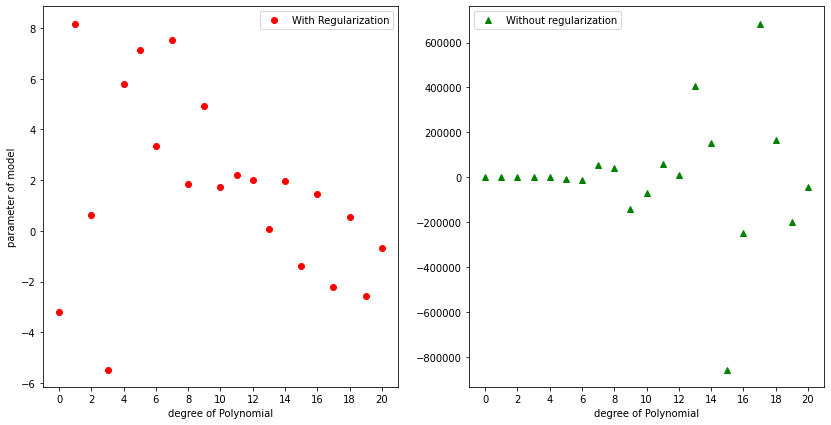

In [ ]:
W=model_coef_no_regular(train_matrix, y_train)
order=np.arange(0, 21, 1)
plt.subplot(1,2,1)
plt.plot(order, W1, "ro")
plt.legend(['With Regularization'])
plt.xlabel('degree of Polynomial')
plt.ylabel('parameter of model')
plt.xticks(np.arange(0, 21, 2))
plt.subplot(1,2,2)
plt.plot(order, W, "g^")
plt.legend(['Without regularization'])
# plt.title('variation of parameter of model with the degree')
plt.xlabel('degree of Polynomial')
# plt.ylabel('parameter of model')
plt.xticks(np.arange(0, 21, 2))

plt.show()


# **3 Gradient Descent for Regression** 

In [287]:
import pandas as pd
train_df=pd.read_csv('/content/drive/MyDrive/Automn 2021/Machin Learning/Assigignment1/hwk1_datasets (1)/Datasets/Dataset_2_train.csv', header=None)
valid_df=pd.read_csv('/content/drive/MyDrive/Automn 2021/Machin Learning/Assigignment1/hwk1_datasets (1)/Datasets/Dataset_2_valid.csv', header=None)
test_df=pd.read_csv('/content/drive/MyDrive/Automn 2021/Machin Learning/Assigignment1/hwk1_datasets (1)/Datasets/Dataset_2_test.csv', header=None)
train_df=train_df.sort_values(by=[0])
valid_df=valid_df.sort_values(by=[0])
test_df=test_df.sort_values(by=[0])



y_train=train_df[[1]]
x_train=train_df[[0]]
train_df=train_df.drop(columns=[2])
train_df.columns=[1,2]

y_valid=valid_df[[1]]
x_valid=valid_df[[0]]
valid_df=valid_df.drop(columns=[2])
valid_df.columns=[1,2]

y_test=test_df[[1]]
x_test=test_df[[0]]
test_df=test_df.drop(columns=[2])
test_df.columns=[1,2]

**3.1**

In [288]:

def SGD(alfa,train_df,valid_df):
  random.seed(0)
  w0=random.random()*10
  w1=random.random()*10
  para_w0=[]
  para_w1=[]
  threshold=1e-3
  rmse_train_list=[]
  rmse_valid_list=[]
  rmse_train=rmse(w0+w1*train_df[1], train_df[2])
  rmse_valid=rmse(w0+w1*valid_df[1], valid_df[2])

  while True:
    para_w0.append(w0)
    para_w1.append(w1)
    rmse_train_prev=rmse_train
    rmse_valid_prev=rmse_valid
    rmse_train_list.append(rmse_train_prev)
    rmse_valid_list.append(rmse_valid_prev)
    train_df=train_df.iloc[np.random.permutation(len(train_df))].reset_index(drop=True)
    for i in range(len(train_df)):
      
      predict_train=w0+w1*train_df[1][i]
      w0=w0-alfa*(predict_train-train_df[2][i])
      w1=w1-alfa*(predict_train-train_df[2][i])*train_df[1][i]
    # predict_train=w0+w1*x_train
    rmse_train=rmse(w0+w1*train_df[1], train_df[2])
    rmse_valid=rmse(w0+w1*valid_df[1], valid_df[2])
    if (rmse_train_prev-rmse_train<0):
      return rmse_train_list,rmse_valid_list,para_w0[-1],para_w1[-1]




In [289]:
rmse_train_list,rmse_valid_list,w0,w1=SGD(1e-4,train_df,valid_df)
print(f'w0 = {w0}\n w1 = {w1} \n RMSE of train set={rmse_train_list[-1]} \n RMSE of validation set={rmse_valid_list[-1]}')

w0 = 3.577772754104847
 w1 = 4.318853057566517 
 RMSE of train set=0.30904430458423626 
 RMSE of validation set=0.27224597899459524


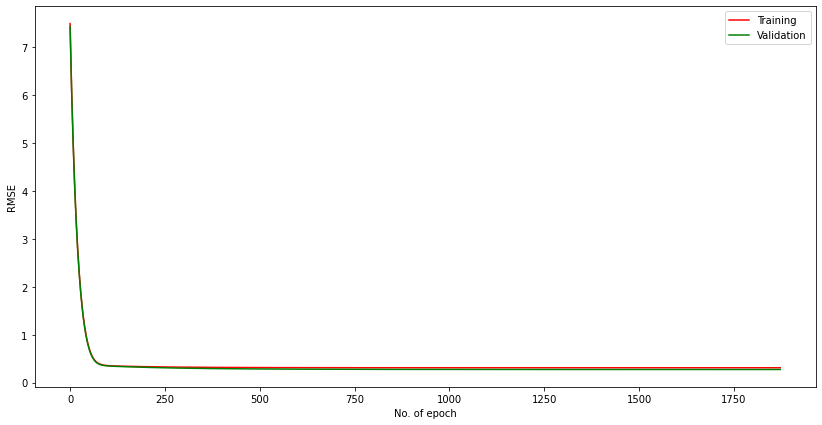

In [290]:
no_epoch=np.arange(0, len(rmse_train_list), 1)
plt.plot(no_epoch, rmse_train_list, "r")
plt.xlabel('No. of epoch')
plt.ylabel('RMSE')
# plt.xticks(np.arange(0, 21, 2))
plt.plot(no_epoch, rmse_valid_list, "g")
# plt.legend(['Without regularization'])
# plt.title('variation of parameter of model with the degree')
# plt.xlabel('degree of Polynomial')
# plt.ylabel('parameter of model')
# plt.xticks(np.arange(0, 21, 2))
plt.legend(['Training', 'Validation'])

plt.show()

**3.2.a**

In [223]:
def SGD_step(alfa,train_df,valid_df):
  random.seed(0)
  w0=random.random()*10
  w1=random.random()*10
  para_w0=[]
  para_w1=[]
  rmse_train_list=[]
  rmse_valid_list=[]
  rmse_train=rmse(w0+w1*train_df[1], train_df[2])
  rmse_valid=rmse(w0+w1*valid_df[1], valid_df[2])

  
  for _ in range(1808):

    para_w0.append(w0)
    para_w1.append(w1)
    rmse_train_prev=rmse_train
    rmse_valid_prev=rmse_valid
    rmse_train_list.append(rmse_train_prev)
    rmse_valid_list.append(rmse_valid_prev)

    train_df=train_df.iloc[np.random.permutation(len(train_df))].reset_index(drop=True)
    for i in range(len(train_df[1])):
      
      predict_train=w0+w1*train_df[1][i]
      w0=w0-alfa*(predict_train-train_df[2][i])
      w1=w1-alfa*(predict_train-train_df[2][i])*train_df[1][i]
    rmse_train=rmse(w0+w1*train_df[1], train_df[2])
    rmse_valid=rmse(w0+w1*valid_df[1], valid_df[2])
    if (rmse_train_prev-rmse_train<0):
      return rmse_train_list,rmse_valid_list,para_w0[-1],para_w1[-1]
  return rmse_train_list,rmse_valid_list,para_w0[-1],para_w1[-1]

In [227]:
rmse_table={}
alphas=np.arange(1e-5,1e-2,5e-4)

for alfa in alphas:

  rmse_train_list,rmse_valid_list,w0,w1=SGD_step(alfa,train_df,valid_df)
  rmse_table[alfa]=rmse_valid_list[-1]


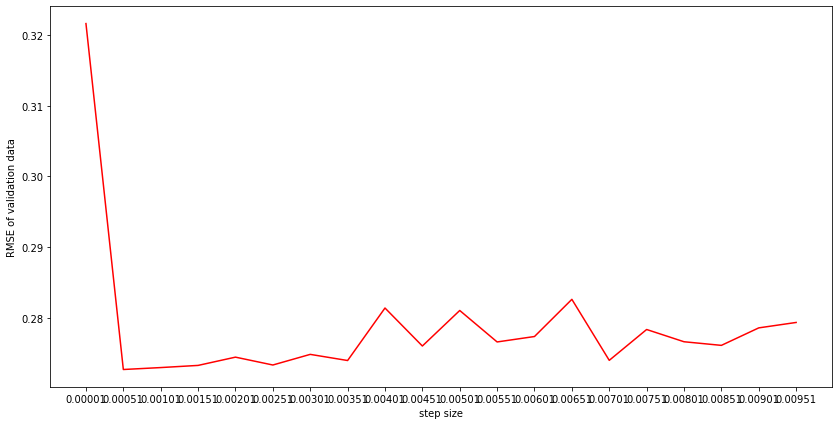

In [234]:
plt.plot(list(rmse_table.keys()), list(rmse_table.values()), "r")
plt.xticks(np.arange(1e-5,1e-2,5e-4))
plt.xlabel('step size')
plt.ylabel('RMSE of validation data')

# plt.legend(['Training', 'Validation'])

plt.show()

In [233]:

import os
FOLDER_PATH ='/content/drive/MyDrive/Automn 2021/Machin Learning/Assigignment1'
index_path = os.path.join(FOLDER_PATH, 'validation performance with different step-sizes.csv')

rmse_valid_df=pd.DataFrame.from_dict(rmse_table,orient='index')
rmse_valid_df=rmse_valid_df.reset_index()
rmse_valid_df.to_csv(open(index_path,'w'), index=False, encoding='utf-8-sig')

In [229]:
best_step_size=min(rmse_table, key=rmse_table.get)
print(best_step_size, rmse_table[best_step_size])

0.00051 0.2727336304801249


**3.2.b**

In [293]:
def SGD_complete_train(alfa,train_df,):
  random.seed(0)
  w0=random.random()*10
  w1=random.random()*10
  para_w0=[]
  para_w1=[]
  threshold=1e-3
  rmse_train_list=[]
  rmse_valid_list=[]
  rmse_train=rmse(w0+w1*train_df[1], train_df[2])

  while True:
    para_w0.append(w0)
    para_w1.append(w1)
    rmse_train_prev=rmse_train
    rmse_train_list.append(rmse_train_prev)
    train_df=train_df.iloc[np.random.permutation(len(train_df))].reset_index(drop=True)
    for i in range(len(train_df)):
      
      predict_train=w0+w1*train_df[1][i]
      w0=w0-alfa*(predict_train-train_df[2][i])
      w1=w1-alfa*(predict_train-train_df[2][i])*train_df[1][i]
    # predict_train=w0+w1*x_train
    rmse_train=rmse(w0+w1*train_df[1], train_df[2])
    if (rmse_train_prev-rmse_train<0):
      return rmse_train_list,rmse_valid_list,para_w0[-1],para_w1[-1]

In [294]:
complete_train_df=pd.concat([train_df,valid_df])
best_step_size=0.00051
rmse_train_list,rmse_valid_list,w0,w1=SGD_complete_train(best_step_size,complete_train_df)
print (f'RMSE of test set with step size of {best_step_size} is equal to {rmse(w0+w1*test_df[1], test_df[2])}')

RMSE of test set with step size of 0.00051 is equal to 0.263761720025618


**3.3**

In [239]:
#gives evolution of parameters
def SGD_w(alfa,train_df,valid_df):
  random.seed(0)
  w0=random.random()*10
  w1=random.random()*10
  para_w0=[]
  para_w1=[]
  rmse_train_list=[]
  rmse_valid_list=[]
  rmse_train=rmse(w0+w1*train_df[1], train_df[2])
  rmse_valid=rmse(w0+w1*valid_df[1], valid_df[2])

  while True:
    para_w0.append(w0)
    para_w1.append(w1)
    rmse_train_prev=rmse_train
    rmse_valid_prev=rmse_valid
    rmse_train_list.append(rmse_train_prev)
    rmse_valid_list.append(rmse_valid_prev)
    train_df=train_df.iloc[np.random.permutation(len(train_df))].reset_index(drop=True)
    for i in range(len(train_df)):
      
      predict_train=w0+w1*train_df[1][i]
      w0=w0-alfa*(predict_train-train_df[2][i])
      w1=w1-alfa*(predict_train-train_df[2][i])*train_df[1][i]
    # predict_train=w0+w1*x_train
    rmse_train=rmse(w0+w1*train_df[1], train_df[2])
    rmse_valid=rmse(w0+w1*valid_df[1], valid_df[2])
    if (rmse_train_prev-rmse_train<0):
      return rmse_train_list,rmse_valid_list,para_w0,para_w1

rmse_train_list,rmse_valid_list,para_w0,para_w1=SGD_w(best_step_size,train_df,valid_df)

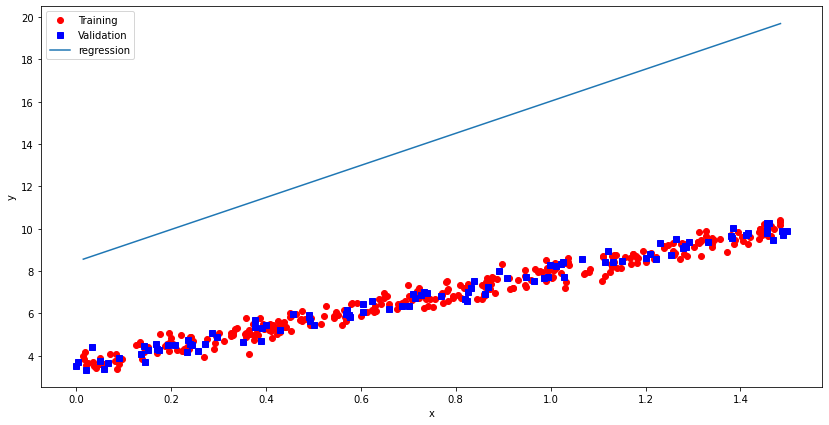

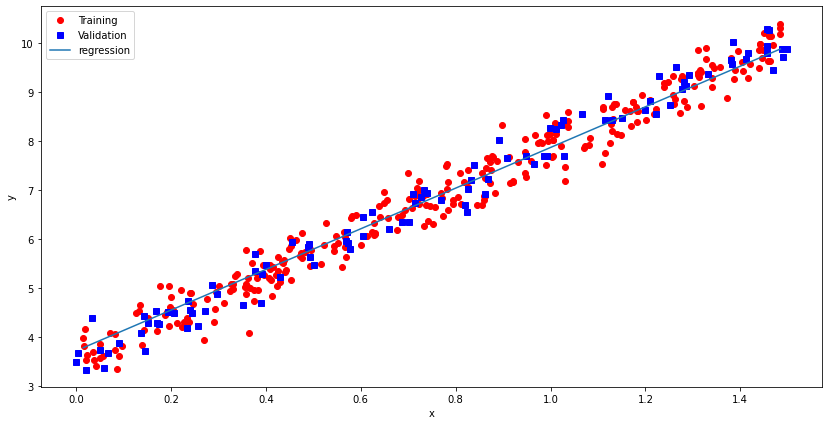

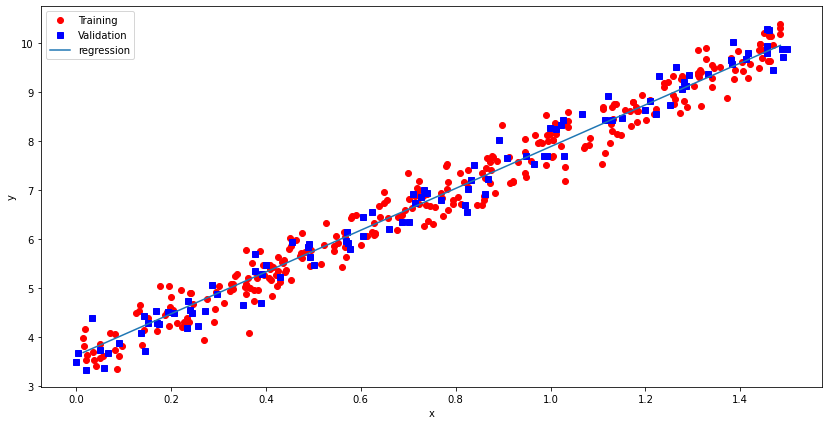

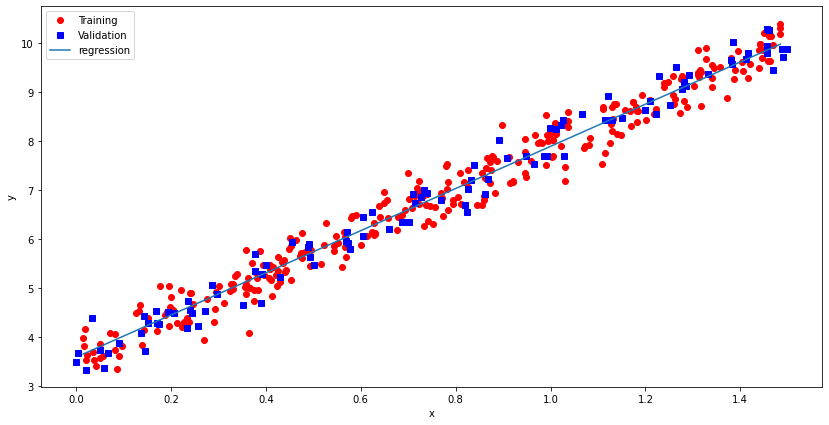

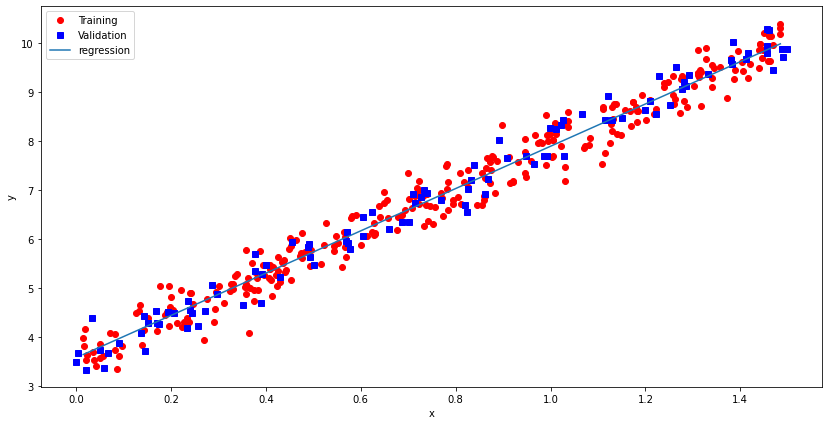

In [297]:
#3-3-3 lists of parameters are para_w0,para_w1

for i in range(5):
  predict_train=para_w0[int(i*(len(para_w0)-1)/4)]+para_w1[int(i*(len(para_w1)-1)/4)]*train_df[1]
  plt.figure(i+1)
  plt.plot(train_df[1], train_df[2], "ro")
  plt.plot(valid_df[1], valid_df[2], "bs")
  plt.plot(train_df[1], predict_train)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(['Training', 'Validation', 'regression'])
  # plt.legend(['Train', 'Performance'])
  # plt.title('20-degree Polynomial with Regularization')
plt.show()

**3.4**

In [ ]:

w0=random.random()*10
w1=random.random()*10
para_w0=[]
para_w1=[]
rmse_train_list=[]
rmse_valid_list=[]
# random.seed(0)
# w0=random.random()*10
# w1=random.random()*10

train_matrix=create_matrix(train_df[[1]],1)
valid_matrix=create_matrix(valid_df[[1]],1)

# diff=1000
# alfa=0.0001
# rmse_train_list=[]
# rmse_valid_list=[]
alfa=1e-4
for _ in range(10000):
  w0_old=w0
  w1_old=w1
  para_w0.append(w0_old)
  para_w1.append(w1_old)
  W=np.array([[w0],[w1]])
  predict_train=np.dot(train_matrix,W)
  rmse_train=rmse(predict_train, y_train)
  rmse_train_list.append(rmse_train)
  predict_valid=np.dot(valid_matrix,W)
  rmse_valid=rmse(predict_valid, y_valid)
  rmse_valid_list.append(rmse_valid)
  w0=w0-alfa*sum(((predict_train-y_train).sum())/train_df.count())
  w1=w1-alfa*(np.dot((predict_train-y_train).T,x_train).sum())/train_df.count()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


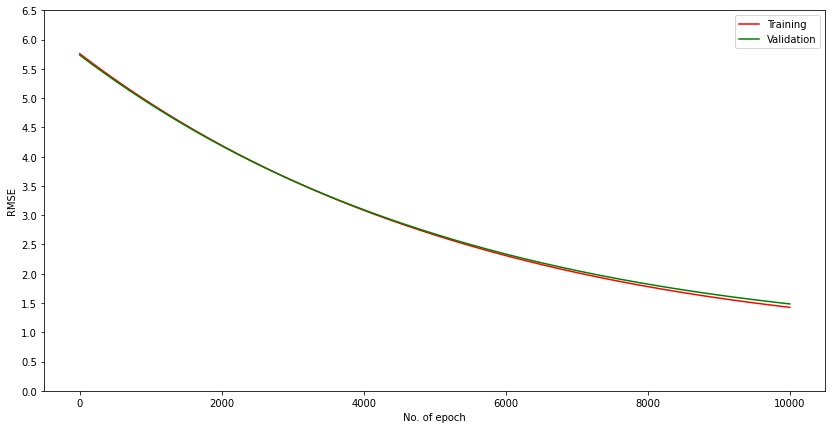

In [ ]:
no_epoch=np.arange(0, len(rmse_train_list), 1)
plt.plot(no_epoch, rmse_train_list, "r")
plt.xlabel('No. of epoch')
plt.ylabel('RMSE')
# plt.xticks(np.arange(0, 21, 2))
plt.plot(no_epoch, rmse_valid_list, "g")
# plt.legend(['Without regularization'])
# plt.title('variation of parameter of model with the degree')
# plt.xlabel('degree of Polynomial')
# plt.ylabel('parameter of model')
# plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0, 7, 0.5))
plt.legend(['Training', 'Validation'])

plt.show()

# ***4 Real Life Dataset***

In [1]:
import pandas as pd
import numpy as np
crime_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', header=None)
crime_data.drop([0, 1, 2, 3, 4], axis=1, inplace=True)

crime_data=crime_data.replace('?', -1e10).astype(np.float64).replace(-1e10, np.nan)
crime_data.isnull().sum().sum()

36851

In [2]:
#missing rows at each column
percent_missing = crime_data.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': crime_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df[missing_value_df['percent_missing']>0]  

,column_name,percent_missing
30,30,1
101,101,1675
102,102,1675
103,103,1675
104,104,1675
105,105,1675
106,106,1675
107,107,1675
108,108,1675
109,109,1675


In [15]:
import os

#replacing missing value with mean of each column
crime_data.fillna(crime_data.mean(), inplace=True)

#creating csv file of complete dataset
FOLDER_PATH ='/content/drive/MyDrive/Automn 2021/Machin Learning/Assigignment1'
index_path = os.path.join(FOLDER_PATH, 'comunities_filled_with_mean.csv')

crime_data.to_csv(open(index_path,'w'), index=False, encoding='utf-8-sig')

In [5]:
#separating test and train chunk
test_crime=crime_data.iloc[:int(len(crime_data.index)*0.2),:]
train_crime_complete=crime_data.iloc[int(len(crime_data.index)*0.2):,:]

In [20]:
import numpy as np
import math

#parameters of linear regression
def model_coef_no_regular(X_matrix, y_train):
  invXTX=np.linalg.pinv(np.dot(X_matrix.T, X_matrix))
  XTy=np.dot(X_matrix.T, y_train)
  return (np.dot(invXTX, XTy))
  
 #function to calculate Root Mean-Square Error
def rmse(prediction, target): 
    return math.sqrt(((prediction - target) ** 2).mean())

#parameters of Ridge regression 
def model_coef_with_regular(X_matrix, y_train, lamda):
  d = np.eye(len(X_matrix.columns))
  invXTXlamda=np.linalg.pinv(np.dot(X_matrix.T, X_matrix)+lamda*d)
  XTy=np.dot(X_matrix.T, y_train)
  return (np.dot(invXTXlamda, XTy))

In [12]:
rmse_train_list=[]
rmse_valid_list=[]
import statistics as st
for i in range(5):
  valid_chunk=train_crime_complete.iloc[int(len(train_crime_complete.index)*i*0.2):int(len(train_crime_complete.index)*(i+1)*0.2),:]
  train_chunk=train_crime_complete.drop(valid_chunk.index)
  train_chunk[0]=1
  train_chunk = train_chunk.reindex(sorted(train_chunk.columns), axis=1)
  y_train=train_chunk.iloc[:,len(train_chunk.columns)-1:]
  x_train=train_chunk.iloc[:,:len(train_chunk.columns)-1]
  valid_chunk[0]=1
  valid_chunk = valid_chunk.reindex(sorted(valid_chunk.columns), axis=1)
  y_valid=valid_chunk.iloc[:,len(valid_chunk.columns)-1:]
  x_valid=valid_chunk.iloc[:,:len(valid_chunk.columns)-1]
  W=model_coef_no_regular(x_train, y_train)
  pred_train=np.dot(x_train,W)
  rmse_train=rmse(pred_train, y_train)
  rmse_train_list.append(rmse_train)
  pred_valid=np.dot(x_valid,W)
  rmse_valid=rmse(pred_valid, y_valid)
  rmse_valid_list.append(rmse_valid)
print(f'rmse of training set: {rmse_train_list} \n the average of rmse of training set:{st.mean(rmse_train_list)}')
print(f'rmse of validation set: {rmse_valid_list} \n the average of rmse of validation set:{st.mean(rmse_valid_list)}')

rmse of training set: [0.11606754137301088, 0.12451134148456065, 0.12673050904667224, 0.12568257620040515, 0.12462782296653947] 
 the average of rmse of training set:0.12352395821423769
rmse of validation set: [0.16571433481774797, 0.13669211805116005, 0.13159166850686502, 1.081667183919037, 0.13728282137341566] 
 the average of rmse of validation set:0.33058962533364517


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [28]:
#test RMSE
x_train_complete = pd.concat([x_train,x_valid])
y_train_complete=pd.concat([y_train,y_valid])
W_no_reg=model_coef_no_regular(x_train_complete, y_train_complete)
pred_train_complete=np.dot(x_train_complete,W_no_reg)
rmse_train=rmse(pred_train_complete, y_train_complete)
y_test=test_crime.iloc[:,len(test_crime.columns)-1:]
x_test=test_crime.iloc[:,:len(test_crime.columns)-1]
x_test[0]=1
x_test = x_test.reindex(sorted(x_test.columns), axis=1)
pred_test=np.dot(x_test,W_no_reg)
rmse_test=rmse(pred_test, y_test)
print(f'rmse of test set without regularization: {rmse_test}')

rmse of test set without regularization: 0.14178756323526112


In [22]:
lamda=np.arange(0, 10, 0.1)
rmse_train_list=[]
rmse_valid_list=[]

for l in lamda:
  
  train_average=[]
  valid_average=[]
  for i in range(5):
    valid_chunk=train_crime_complete.iloc[int(len(train_crime_complete.index)*i*0.2):int(len(train_crime_complete.index)*(i+1)*0.2),:]
    train_chunk=train_crime_complete.drop(valid_chunk.index)
    train_chunk[0]=1
    train_chunk = train_chunk.reindex(sorted(train_chunk.columns), axis=1)
    y_train=train_chunk.iloc[:,len(train_chunk.columns)-1:]
    x_train=train_chunk.iloc[:,:len(train_chunk.columns)-1]
    valid_chunk[0]=1
    valid_chunk = valid_chunk.reindex(sorted(valid_chunk.columns), axis=1)
    y_valid=valid_chunk.iloc[:,len(valid_chunk.columns)-1:]
    x_valid=valid_chunk.iloc[:,:len(valid_chunk.columns)-1]
    W=model_coef_with_regular(x_train, y_train, l)
    pred_train=np.dot(x_train,W)
    rmse_train=rmse(pred_train, y_train)
    train_average.append(rmse_train)
    pred_valid=np.dot(x_valid,W)
    rmse_valid=rmse(pred_valid, y_valid)
    valid_average.append(rmse_valid)
  rmse_train_list.append(st.mean(train_average))
  rmse_valid_list.append(st.mean(valid_average))
  best_lamda=lamda[np.argmin(rmse_valid_list)]
print(f'Minimum of RMSE of validation set is: {min(rmse_valid_list)} \nAchieved by lambda equal to:{best_lamda}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Minimum of RMSE of validation set is: 0.1353713734780528 
Achieved by lambda equal to:3.0


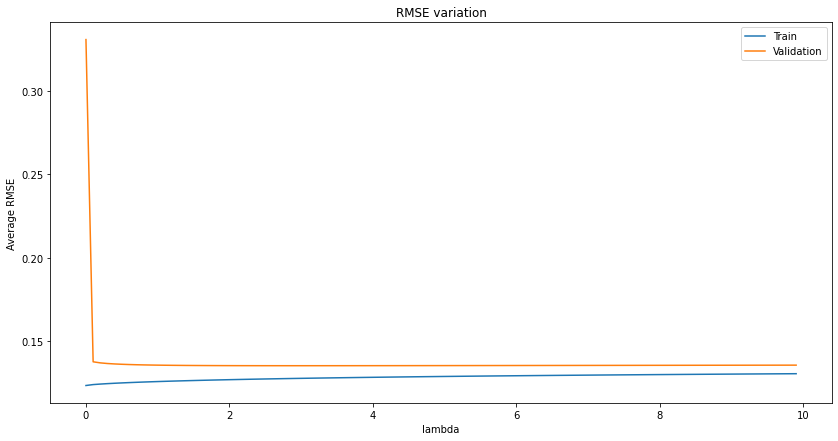

In [24]:
import matplotlib.pyplot as plt

plt.plot(lamda, rmse_train_list)
plt.plot(lamda, rmse_valid_list)
# plt.plot(lamda, rmse_test_list)
plt.xlabel('lambda') 
plt.ylabel('Average RMSE')
plt.legend(['Train', 'Validation'])
plt.title('RMSE')
plt.rcParams["figure.figsize"] = (14,7)
plt.show()

In [29]:
# x_train_complete = pd.concat([x_train,x_valid])
# y_train_complete=pd.concat([y_train,y_valid])
W_reg=model_coef_with_regular(x_train_complete, y_train_complete, best_lamda)
pred_train_complete=np.dot(x_train_complete,W_reg)
rmse_train=rmse(pred_train_complete, y_train_complete)
# y_test=test_crime.iloc[:,len(test_crime.columns)-1:]
# x_test=test_crime.iloc[:,:len(test_crime.columns)-1]
# x_test[0]=1
# x_test = x_test.reindex(sorted(x_test.columns), axis=1)
pred_test=np.dot(x_test,W_reg)
rmse_test=rmse(pred_test, y_test)
print(f'rmse of test set with regularization: {rmse_test}')

rmse of test set with regularization: 0.14109081001761645


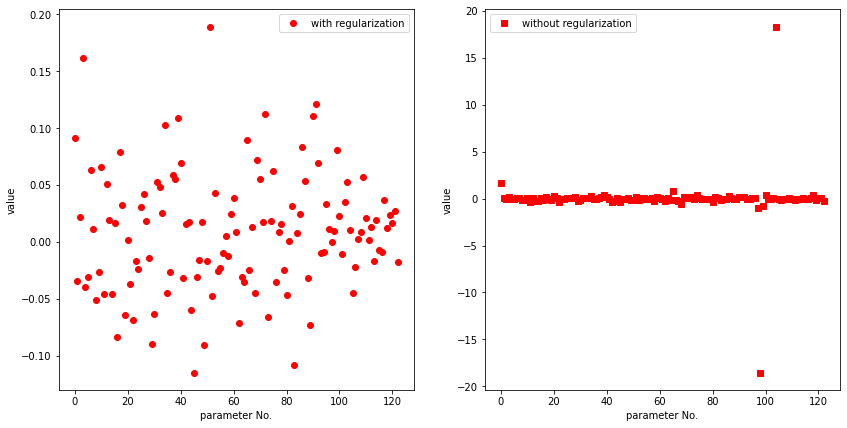

In [38]:
import matplotlib.pyplot as plt
param_no=np.arange(0, len(W_reg), 1)
plt.subplot(1,2,1)
plt.plot(param_no, W_reg, "ro")
plt.xlabel('parameter No.') 
plt.ylabel('value')
plt.legend(['with regularization'])

plt.subplot(1,2,2)
plt.plot(param_no, W_no_reg, "rs")
plt.xlabel('parameter No.') 
plt.ylabel('value')
plt.legend(['without regularization'])

plt.rcParams["figure.figsize"] = (14,7)
plt.show()

In [84]:
W_reg_para=W_reg[1:] #delete first parameter
ind = np.argsort(np.abs(W_reg_para), axis=0)
for n in range(2,len(ind)+5,5):
  lamda=np.arange(0, 10, 0.1)
  rmse_train_list=[]
  rmse_valid_list=[]
  ind_top=ind[:-n-1:-1] #select top n indices
  ind_top_tran=np.transpose(ind_top)[0]
  x_feat_selec=train_crime_complete.iloc[:,:len(train_crime_complete.columns)-1]
  y_train_complete=train_crime_complete.iloc[:,len(train_crime_complete.columns)-1:]
  x_top=x_feat_selec.iloc[:,ind_top_tran]  #selecting top features
  for l in lamda:
    
    train_average=[]
    valid_average=[]
    for i in range(5):

      x_valid_chunk=x_top.iloc[int(len(x_top.index)*i*0.2):int(len(x_top.index)*(i+1)*0.2),:]
      x_train_chunk=x_top.drop(x_valid_chunk.index)
      x_train_chunk[0]=1
      x_train_chunk = x_train_chunk.reindex(sorted(x_train_chunk.columns), axis=1)
      
      # y_train=train_crime_complete.iloc[:,len(train_crime_complete.columns)-1:]
      x_valid_chunk[0]=1
      x_valid_chunk = x_valid_chunk.reindex(sorted(x_valid_chunk.columns), axis=1)
      y_valid_chunk=y_train_complete.iloc[int(len(x_top.index)*i*0.2):int(len(x_top.index)*(i+1)*0.2),:]
      y_train_chunk=y_train_complete.drop(y_valid_chunk.index)
      W_reg_top=model_coef_with_regular(x_train_chunk, y_train_chunk, l)
      pred_train=np.dot(x_train_chunk,W_reg_top)
      rmse_train=rmse(pred_train, y_train_chunk)
      train_average.append(rmse_train)
      pred_valid=np.dot(x_valid_chunk,W_reg_top)
      rmse_valid=rmse(pred_valid, y_valid_chunk)
      valid_average.append(rmse_valid)
    rmse_train_list.append(st.mean(train_average))
    rmse_valid_list.append(st.mean(valid_average))
    best_lamda=lamda[np.argmin(rmse_valid_list)]
  print(f'for number of featurers equal to {n} \n Minimum of RMSE of validation set is: {min(rmse_valid_list)} \nAchieved by lambda equal to:{best_lamda}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


for number of featurers equal to 2 
 Minimum of RMSE of validation set is: 0.15377389710350603 
Achieved by lambda equal to:0.0
for number of featurers equal to 7 
 Minimum of RMSE of validation set is: 0.1427534452308658 
Achieved by lambda equal to:1.3
for number of featurers equal to 12 
 Minimum of RMSE of validation set is: 0.13811081560291294 
Achieved by lambda equal to:0.7000000000000001
for number of featurers equal to 17 
 Minimum of RMSE of validation set is: 0.1362284709220853 
Achieved by lambda equal to:1.3
for number of featurers equal to 22 
 Minimum of RMSE of validation set is: 0.134950220576055 
Achieved by lambda equal to:1.4000000000000001
for number of featurers equal to 27 
 Minimum of RMSE of validation set is: 0.13464425566790847 
Achieved by lambda equal to:1.9000000000000001
for number of featurers equal to 32 
 Minimum of RMSE of validation set is: 0.13442527984878863 
Achieved by lambda equal to:2.2
for number of featurers equal to 37 
 Minimum of RMSE of v

**4.3.b**

In [85]:
W_reg_para=W_reg[1:] #delete first parameter
ind = np.argsort(W_reg_para, axis=0)
ind_top=ind[:-43:-1] #select top 20 positive parameters indices
ind_top_tran=np.transpose(ind_top)[0]
x_feat_selec=train_crime_complete.iloc[:,:len(train_crime_complete.columns)-1]
y_train_complete=train_crime_complete.iloc[:,len(train_crime_complete.columns)-1:]
x_top=x_feat_selec.iloc[:,ind_top_tran]  #selecting top features
x_top[0]=1
x_top = x_top.reindex(sorted(x_top.columns), axis=1)
x_test=test_crime.iloc[:,:len(test_crime.columns)-1]

x_test_top=x_test.iloc[:,ind_top_tran]
x_test_top[0]=1
x_test_top = x_test_top.reindex(sorted(x_test_top.columns), axis=1)
W_top_feature=model_coef_with_regular(x_top, y_train_complete,1.6)
y_pred_top=np.dot(x_top,W_top_feature)
rmse_train=rmse(y_pred_top, y_train_complete)

pred_test=np.dot(x_test_top,W_top_feature)
rmse_test=rmse(pred_test, y_test)

print(rmse_train,rmse_test)

0.13408157798799078 0.14420152107179438


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
